In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('latin-1')
sys.stdout = stdout

wd = "E:\Projects\Bachelorscriptie"
os.chdir(wd)
hw_lvl_3 = pd.read_csv('datafiles/dataframes/working/huwelijk_lvl_3_extended.csv', sep='|', index_col=False)
hw_lvl_4 = pd.read_csv('datafiles/dataframes/working/huwelijk_lvl_4_extended.csv', sep='|', index_col=False)
hw_lvl_5 = pd.read_csv('datafiles/dataframes/working/huwelijk_lvl_5_extended.csv', sep='|', index_col=False)

hw_lvl_3['th'] = 3
hw_lvl_4['th'] = 4
hw_lvl_5['th'] = 5

COLUMNS = hw_lvl_3.columns

In [2]:
hw_lvl_3

,dist,id_1,target_name_1,target_name_2,target_name_3,target_name_4,id_2,candidate_name_1,candidate_name_2,candidate_name_3,...,length_name_1,length_name_2,length_name_3,length_name_4,dist_name_1,dist_name_2,dist_name_3,dist_name_4,ED_Label,th
0,0,704975,francois,orlebeke,anna,ee,825011,francois,orlebeke,anna,...,8,8,4,2,0,0,0,0,NaN,3
1,0,704975,francois,orlebeke,anna,ee,765913,francois,orlebeke,anna,...,8,8,4,2,0,0,0,0,NaN,3
2,0,704975,francois,orlebeke,anna,ee,867673,francois,orlebeke,anna,...,8,8,4,2,0,0,0,0,NaN,3
3,0,704975,francois,orlebeke,anna,ee,871314,francois,orlebeke,anna,...,8,8,4,2,0,0,0,0,NaN,3
4,0,726156,jacobus,dieleman,maria,ee,792357,jacobus,dieleman,maria,...,7,8,5,2,0,0,0,0,NaN,3
5,3,847018,jacobus,dieleman,maria,deij,792357,jacobus,dieleman,maria,...,7,8,5,4,0,0,0,3,3,3
6,0,871025,pieter,dees,maria,ee,797450,pieter,dees,maria,...,6,4,5,2,0,0,0,0,NaN,3
7,0,871025,pieter,dees,maria,ee,887689,pieter,dees,maria,...,6,4,5,2,0,0,0,0,NaN,3
8,0,721357,josephus,babijn,catharina,ee,801059,josephus,babijn,catharina,...,8,6,9,2,0,0,0,0,NaN,3
9,0,721357,josephus,babijn,catharina,ee,770988,josephus,babijn,catharina,...,8,6,9,2,0,0,0,0,NaN,3


In [3]:
hw_lvl_3_exact = hw_lvl_3[hw_lvl_3.dist == 0]

In [4]:
hw_lvl_3_errors = hw_lvl_3[hw_lvl_3.dist > 0]

In [5]:
# groter dan 0 werkt ook, als err = 0, dan zit de fout dus kennelijk ergens anders en dus maakt het negeren van deze naam niet uit
hw_lvl_3_errors_name_1 = hw_lvl_3_errors[hw_lvl_3_errors.dist_name_1 >= 0] 
hw_lvl_3_errors_name_2 = hw_lvl_3_errors[hw_lvl_3_errors.dist_name_2 >= 0]
hw_lvl_3_errors_name_3 = hw_lvl_3_errors[hw_lvl_3_errors.dist_name_3 >= 0]
hw_lvl_3_errors_name_4 = hw_lvl_3_errors[hw_lvl_3_errors.dist_name_4 >= 0]

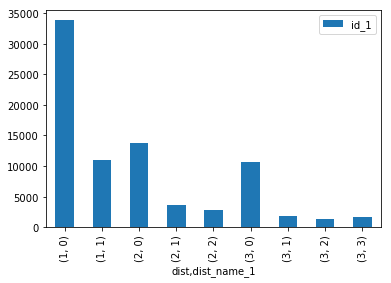

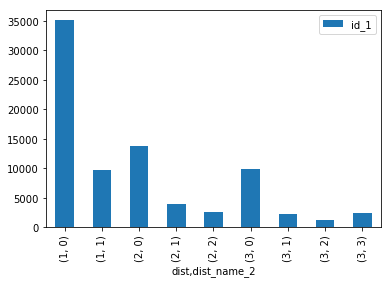

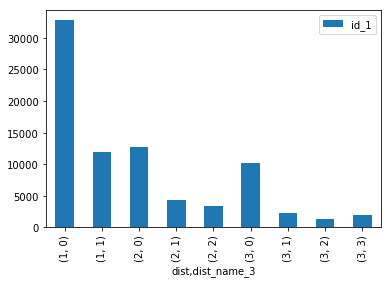

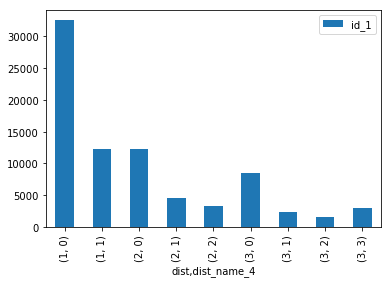

In [6]:
hw_lvl_3_errors_name_1[['dist', 'id_1', 'dist_name_1']].groupby(['dist', 'dist_name_1']).count().plot(kind='bar')
hw_lvl_3_errors_name_2[['dist', 'id_1', 'dist_name_2']].groupby(['dist', 'dist_name_2']).count().plot(kind='bar')
hw_lvl_3_errors_name_3[['dist', 'id_1', 'dist_name_3']].groupby(['dist', 'dist_name_3']).count().plot(kind='bar')
hw_lvl_3_errors_name_4[['dist', 'id_1', 'dist_name_4']].groupby(['dist', 'dist_name_4']).count().plot(kind='bar')
plt.show()

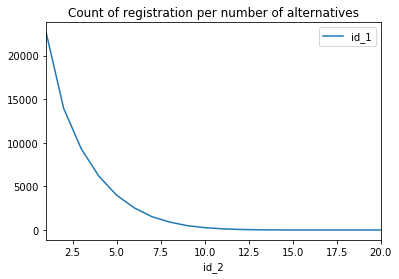

In [7]:
ax_exact = hw_lvl_3_exact[['id_1', 'id_2']].groupby('id_1').count().reset_index().groupby('id_2').count().plot()
ax_exact.legend()
ax_exact.set_title('Count of registration per number of alternatives')
plt.show()

In [8]:
hw_lvl_3_errors_name_1.dist = hw_lvl_3_errors_name_1.dist - hw_lvl_3_errors_name_1.dist_name_1
hw_lvl_3_errors_name_1.dist_name_1 = 0
ax_name_1 = hw_lvl_3_errors_name_1[hw_lvl_3_errors_name_1.dist == 0][['id_1', 'id_2']].groupby('id_1').count().reset_index().groupby('id_2').count().plot()

In [9]:
hw_lvl_3_errors_name_2.dist = hw_lvl_3_errors_name_2.dist - hw_lvl_3_errors_name_2.dist_name_2
hw_lvl_3_errors_name_2.dist_name_2 = 0
hw_lvl_3_errors_name_2[hw_lvl_3_errors_name_2.dist == 0][['id_1', 'id_2']].groupby('id_1').count().reset_index().groupby('id_2').count().plot(ax=ax_name_1)

In [10]:
hw_lvl_3_errors_name_3.dist = hw_lvl_3_errors_name_3.dist - hw_lvl_3_errors_name_3.dist_name_3
hw_lvl_3_errors_name_3.dist_name_3 = 0
hw_lvl_3_errors_name_3[hw_lvl_3_errors_name_3.dist == 0][['id_1', 'id_2']].groupby('id_1').count().reset_index().groupby('id_2').count().plot(ax=ax_name_1)

In [11]:
hw_lvl_3_errors_name_4.dist = hw_lvl_3_errors_name_4.dist - hw_lvl_3_errors_name_4.dist_name_4
hw_lvl_3_errors_name_4.dist_name_4 = 0
hw_lvl_3_errors_name_4[hw_lvl_3_errors_name_4.dist == 0][['id_1', 'id_2']].groupby('id_1').count().reset_index().groupby('id_2').count().plot(ax=ax_name_1)

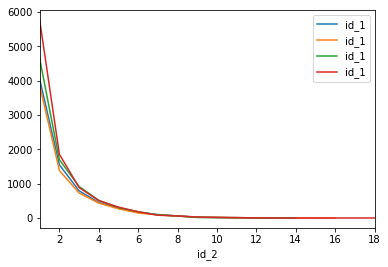

In [12]:
plt.show()